In [36]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import json
import seaborn
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
data1 = pd.read_csv('PollutionData_Delhi_Nov_2015.csv')
data1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,pm25,rh,at,ws
0,2015-11-04,00:00:00,00:59:00,355.00,78.50,16.60,0.3
1,2015-11-04,01:00:00,01:59:00,304.00,79.92,16.18,0.3
2,2015-11-04,02:00:00,02:59:00,309.50,80.75,15.87,0.3
3,2015-11-04,03:00:00,03:59:00,334.83,81.50,15.48,0.3
4,2015-11-04,04:00:00,04:59:00,322.00,82.00,15.18,0.3


In [7]:
# converting time columns to datetime

In [11]:
data1['dt'] = pd.to_datetime(data1['Unnamed: 0'] + " " + data1['Unnamed: 1'])
data1['dt'].head()

0   2015-11-04 00:00:00
1   2015-11-04 01:00:00
2   2015-11-04 02:00:00
3   2015-11-04 03:00:00
4   2015-11-04 04:00:00
Name: dt, dtype: datetime64[ns]

In [12]:
data1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,pm25,rh,at,ws,dtstr,dt
0,2015-11-04,00:00:00,00:59:00,355.00,78.50,16.60,0.3,2015-11-04 00:00:00,2015-11-04 00:00:00
1,2015-11-04,01:00:00,01:59:00,304.00,79.92,16.18,0.3,2015-11-04 01:00:00,2015-11-04 01:00:00
2,2015-11-04,02:00:00,02:59:00,309.50,80.75,15.87,0.3,2015-11-04 02:00:00,2015-11-04 02:00:00
3,2015-11-04,03:00:00,03:59:00,334.83,81.50,15.48,0.3,2015-11-04 03:00:00,2015-11-04 03:00:00
4,2015-11-04,04:00:00,04:59:00,322.00,82.00,15.18,0.3,2015-11-04 04:00:00,2015-11-04 04:00:00


In [23]:
data = data1[[u'pm25', u'rh', u'at', u'ws', 'dtstr', 'dt']]
data.columns

Index(['pm25', 'rh', 'at', 'ws', 'dtstr', 'dt'], dtype='object')

In [24]:
data.columns = [[u'pm25', u'rh', u'temp', u'ws', 'dtstr', 'dt']]
data.columns

Index(['pm25', 'rh', 'temp', 'ws', 'dtstr', 'dt'], dtype='object')

In [15]:
# Would like to plot the graph for durinal timeframe so as to account for rush-hours and solar insolation  

In [27]:
data.head()

,pm25,rh,temp,ws,dtstr,dt
0,355.00,78.50,16.60,0.3,2015-11-04 00:00:00,2015-11-04 00:00:00
1,304.00,79.92,16.18,0.3,2015-11-04 01:00:00,2015-11-04 01:00:00
2,309.50,80.75,15.87,0.3,2015-11-04 02:00:00,2015-11-04 02:00:00
3,334.83,81.50,15.48,0.3,2015-11-04 03:00:00,2015-11-04 03:00:00
4,322.00,82.00,15.18,0.3,2015-11-04 04:00:00,2015-11-04 04:00:00


In [28]:
type(data.dt.values[0])

numpy.datetime64

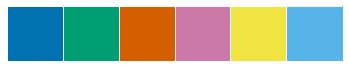

In [16]:
import seaborn as sns
current_palette = sns.color_palette('colorblind')
sns.palplot(current_palette)
#sns.palplot('colorblind')
#Not sure if this insures the plots below are colour-blind friendly 

In [17]:
Regressd = smf.ols(formula = 'pm25 ~ rh + temp + ws', data = data).fit()

Regressd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     43.86
Date:                Fri, 21 Oct 2016   Prob (F-statistic):           8.11e-26
Time:                        23:15:19   Log-Likelihood:                -3994.4
No. Observations:                 653   AIC:                             7997.
Df Residuals:                     649   BIC:                             8015.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    174.5240     49.788      3.505      0.000        76.758   272.290
rh             2.0941      0.441      4.753      0.000         1.229     2.959
temp          -2.1802      1.433     -1.522      0.129        -4.994     0.633
ws           -10.4939     10.830     -0.969      0.333       -31.760    10.773
==============================================================================
Omnibus:                      267.346   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1726.924
Skew:                           1.696   Prob(JB):                         0.00
Kurtosis:                      10.209   Cond. No.                         741.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,0,'Wind speed')

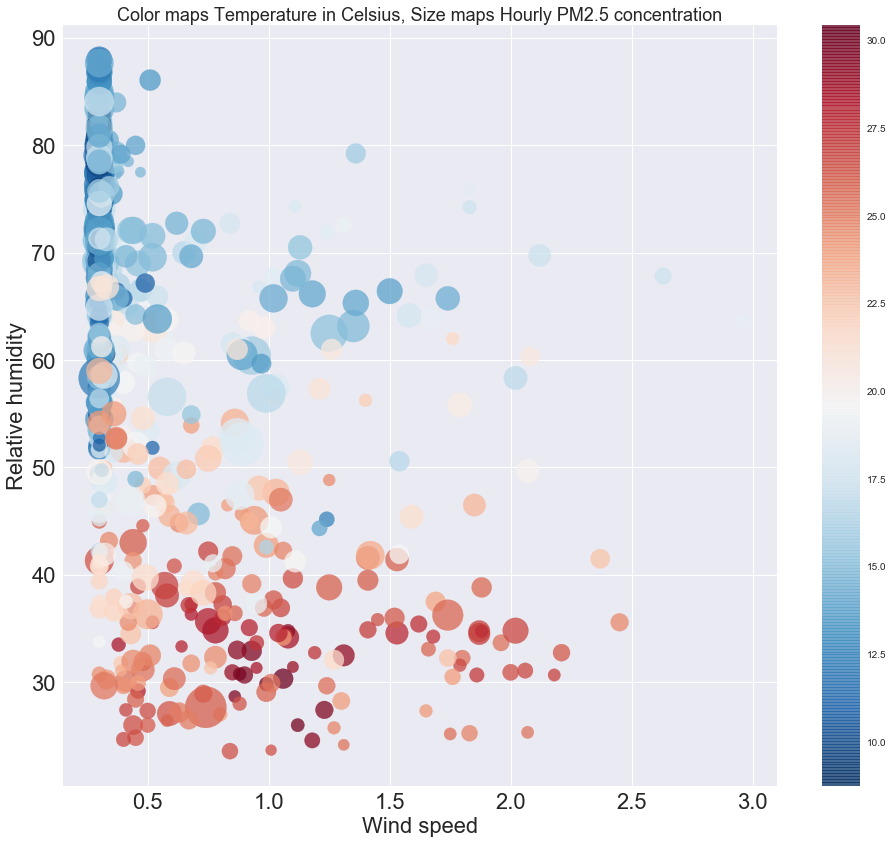

In [18]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
data.plot(kind='scatter', x= 'ws', y='rh', ax=ax,
                fontsize=22, colormap='RdBu_r', alpha = .75, 
                marker='o',  figsize=(16, 14),
                s=(data['pm25'] * 2), 
                c=data['temp'])
ax.set_title('Color maps Temperature in Celsius, Size maps Hourly PM2.5 concentration', fontsize=18)
ax.set_ylabel("Relative humidity", fontsize=22)
ax.set_xlabel("Wind speed", fontsize=22)


Text(0.5,0,'Temperature in Celsius')

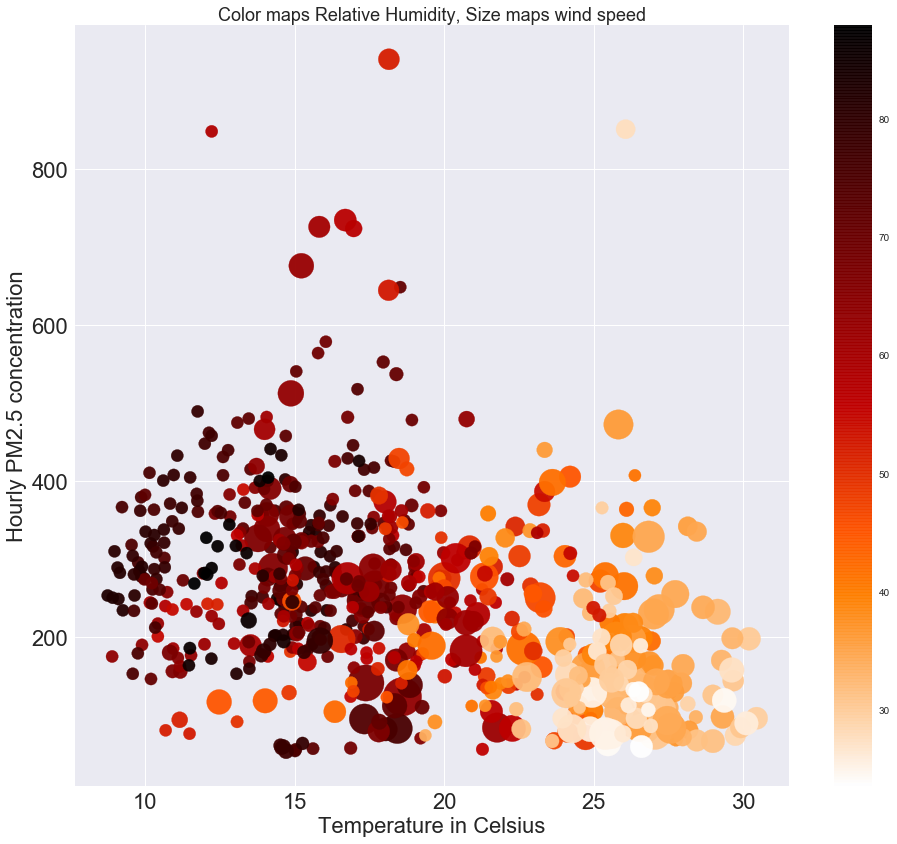

In [19]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
data.plot(kind='scatter', x= 'temp', y='pm25', ax=ax,
                fontsize=22, colormap='gist_heat_r', alpha = .95, 
                marker='o',  figsize=(16, 14),
                s=(data['ws'] * 500), 
                c=data['rh'])
ax.set_title('Color maps Relative Humidity, Size maps wind speed', fontsize=18)
ax.set_ylabel("Hourly PM2.5 concentration", fontsize=22)
ax.set_xlabel("Temperature in Celsius", fontsize=22)


Text(0.5,0,'Temperature in Celsius')

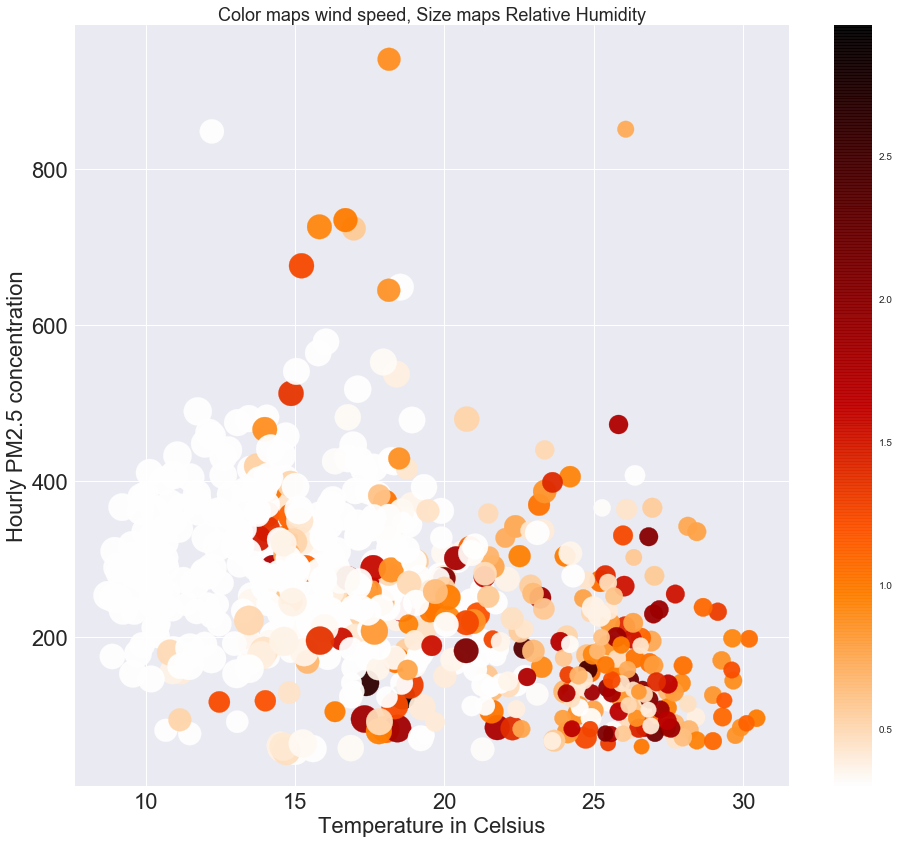

In [20]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
data.plot(kind='scatter', x= 'temp', y='pm25', ax=ax,
                fontsize=22, colormap='gist_heat_r', alpha = .95, 
                marker='o',  figsize=(16, 14),
                s=(data['rh'] * 10), 
                c=data['ws'])
ax.set_title('Color maps wind speed, Size maps Relative Humidity', fontsize=18)
ax.set_ylabel("Hourly PM2.5 concentration", fontsize=22)
ax.set_xlabel("Temperature in Celsius", fontsize=22)

Text(0.5,0,'Temperature in Celsius')

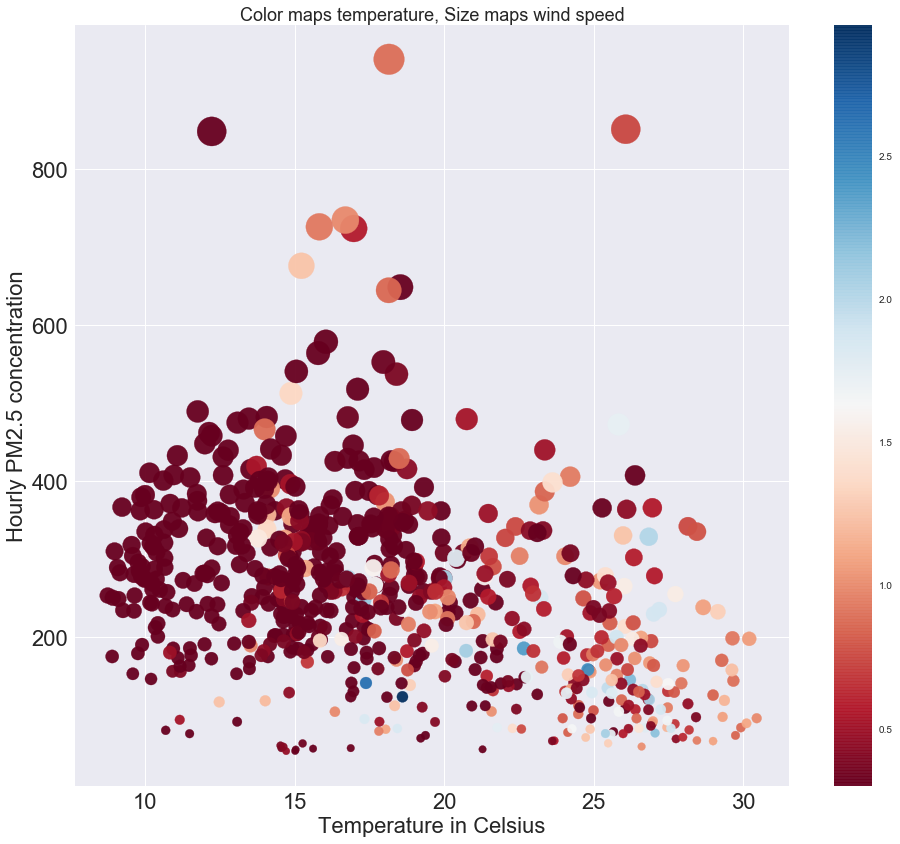

In [21]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
data.plot(kind='scatter', x= 'temp', y='pm25', ax=ax,
                fontsize=22, colormap='RdBu', alpha = .95, 
                marker='o',  figsize=(16, 14),
                s=(data['pm25']), 
                c=data['ws'])
ax.set_title('Color maps temperature, Size maps wind speed', fontsize=18)
ax.set_ylabel("Hourly PM2.5 concentration", fontsize=22)
ax.set_xlabel("Temperature in Celsius", fontsize=22)

//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/cbook.py:2590: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


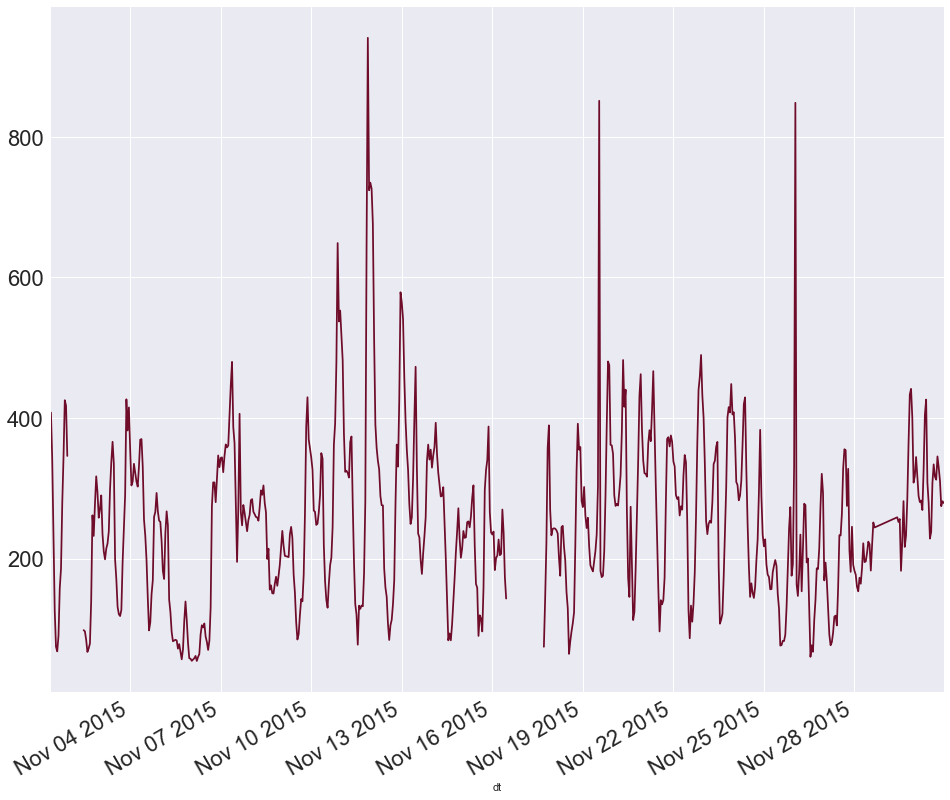

In [52]:
data.plot(x='dt', y='pm25',
                fontsize=22, colormap='RdBu', alpha = .95, 
                figsize=(16, 14),
                c=data['ws'], legend=False)

//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/cbook.py:2590: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


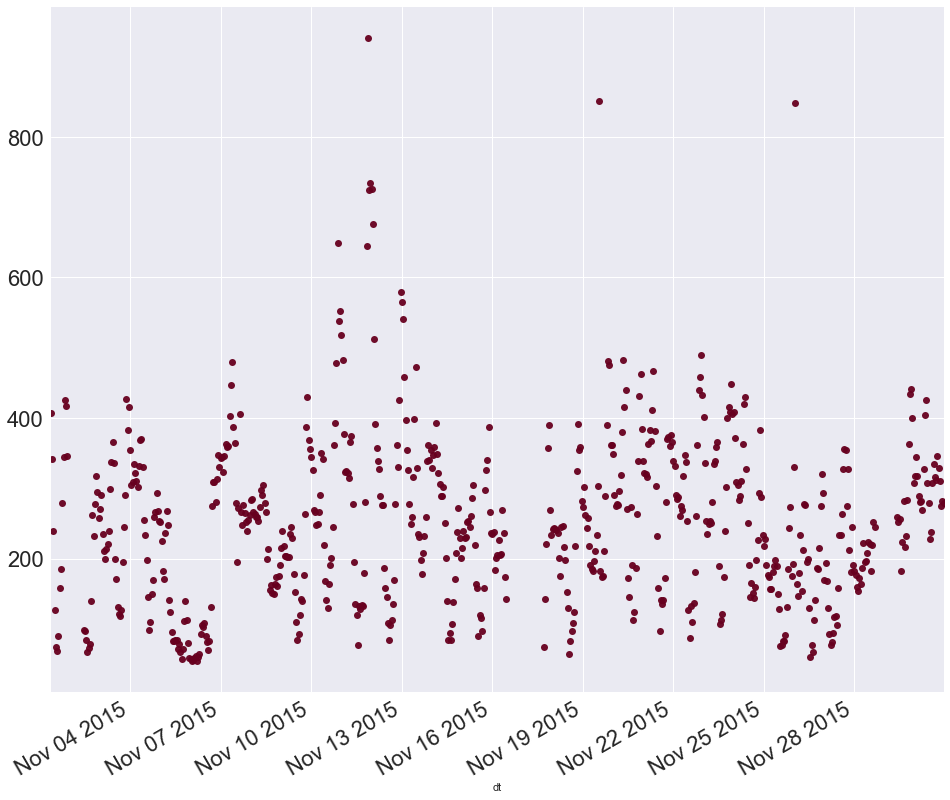

In [51]:
data.plot(x='dt', y='pm25', marker='o', linewidth=0,
                fontsize=22, colormap='RdBu', alpha = .95, 
                figsize=(16, 14),
                c=data['ws'], legend=False)
